In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [9]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt):
    cAMP = x[0]
    PDEp = x[1]

    def G(u, v, J, K):
        numerator = 2 * u * K
        den_1 = v - u + v * J + u * K
        den_2 = -4 * (v - u) * u * K
        radicand = den_1**2 + den_2
        denominator = den_1 + np.sqrt(radicand)
        return numerator / denominator

    ACp = ACt * G(r1 * cAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)
    dPDEp = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1 * ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]


def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt):
    cAMP_vals = np.linspace(-30, 30, 10000)
    PDEp_vals = np.linspace(-30, 30, 10000)
    cAMP_grid, PDEp_grid = np.meshgrid(cAMP_vals, PDEp_vals)

    t = 0
    x = np.array([cAMP_grid, PDEp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt)
    print(nullclines)
    plt.figure(figsize=(8, 6))
    plt.scatter(0, 0, color='black', marker='o', label='Fixed point (0,0)', alpha=1, zorder=10)
    plt.scatter(0.951867, 1.65682, color='black', marker='o', label='Fixed point (0.951867,1.65682)', zorder=10)
    plt.contour(cAMP_grid, PDEp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid, PDEp_grid, nullclines[1], levels=[0], colors='green', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('PDEp')
    #plt.plot(sol.y[0], sol.y[1], "--", label=rf"$cAMP_0={cAMP_0:.2f}$, $PDEp_0={PDEp_0:.2f}$", color='black')
    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='green', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]

    plt.legend(custom_lines, ['cAMP nullcline', 'PDEp nullcline', 'Fixed points (0,0) and (0.95,1.65)'], loc='lower right', bbox_to_anchor=(1, 0.5))
    plt.title(f'PDEp and cAMP nullclines')
    plt.ylim(-0.15, 9)
    plt.xlim(-0.15, 9)
    #plt.xlim(-30,30)
    #plt.ylim(-30,30)
    plt.savefig(f'2D_nullcline', dpi=300)
    plt.show()

k = 35

k1, k3, k2 = 9.18/k, 0.12/k, 10/k
r1, r2, r3, r4 = 2.04/k, 9.34/k, 0.56/k, 1.84/k
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04


[array([[-259.08612367, -259.03464296, -258.98316223, ...,  259.54674064,
         259.59815673,  259.64957281],
       [-259.03468995, -258.98321953, -258.93174909, ...,  259.4953275 ,
         259.5467333 ,  259.5981391 ],
       [-258.98325624, -258.9317961 , -258.88033595, ...,  259.44391436,
         259.49530987,  259.54670538],
       ...,
       [ 255.09672319,  255.04535704,  254.99399092, ..., -254.4304125 ,
        -254.48184327, -254.53327404],
       [ 255.14815691,  255.09678047,  255.04540406, ..., -254.48182564,
        -254.5332667 , -254.58470776],
       [ 255.19959062,  255.1482039 ,  255.0968172 , ..., -254.53323878,
        -254.58469013, -254.63614147]]), array([[-15.2164645 , -15.21344248, -15.21042047, ...,  14.99463432,
         14.99765634,  15.00067836],
       [-15.21417869, -15.21115713, -15.20813557, ...,  14.99234916,
         14.99537072,  14.99839228],
       [-15.21189288, -15.20887177, -15.20585067, ...,  14.99006401,
         14.99308511,  14.996106

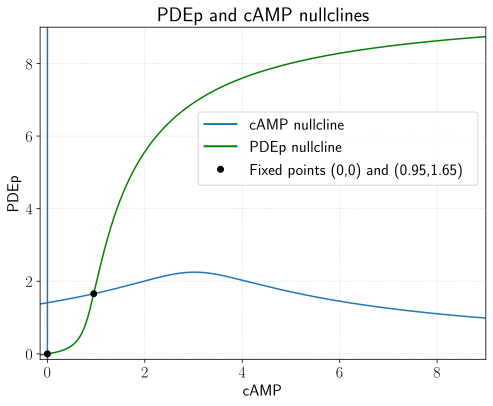

In [10]:
plot_nullclines(k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, ACt, PDEt)